In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [49]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\internship\cognifyz tasks\Dataset .csv")

In [50]:
# Display the first few rows of the dataset for understanding
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [51]:
# Step 1: Handle missing values
df = df.dropna()  # Drop rows with missing values

In [52]:

# Step 2: Map and encode categorical columns
# Map "Rating text" to numeric values
df['Rating text'] = df['Rating text'].map({
    'Poor': 1, 
    'Average': 2, 
    'Good': 3, 
    'Very Good': 4, 
    'Excellent': 5
})

In [53]:
# Map "Has Table booking" and "Has Online delivery" to binary values
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [54]:
# One-hot encode the "Cuisines" column
df = pd.get_dummies(df, columns=['Cuisines'], drop_first=True)

In [55]:
# Step 3: Select features and the target variable
features = ['Price range', 'Votes', 'Latitude', 'Longitude', 'Rating text', 'Has Table booking', 'Has Online delivery'] + \
        [col for col in df.columns if col.startswith('Cuisines_')]
X = df[features]
y = df['Aggregate rating']

In [56]:
# Handle missing values in features (if any)
X = X.fillna(X.mean())  # Replace NaN with mean values

In [57]:
# Verify no missing values remain
print(X.isnull().sum())

Price range                                 0
Votes                                       0
Latitude                                    0
Longitude                                   0
Rating text                                 0
                                           ..
Cuisines_Western, Asian, Cafe               0
Cuisines_Western, Fusion, Fast Food         0
Cuisines_World Cuisine                      0
Cuisines_World Cuisine, Mexican, Italian    0
Cuisines_World Cuisine, Patisserie, Cafe    0
Length: 1831, dtype: int64


In [58]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Step 5: Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [61]:
# Step 7: Evaluate the model
rmse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f"Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Model Evaluation:
RMSE: 21671330.716881502
R² Score: -1.8739153821753996e+16


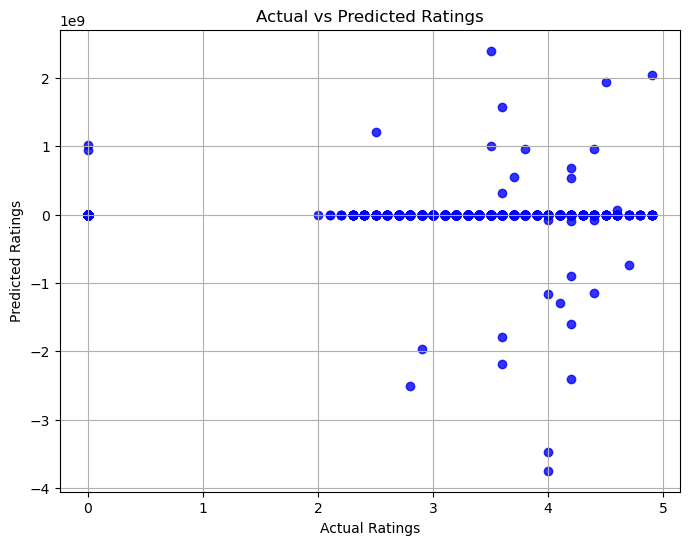

In [63]:
# Step 8: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8, color='blue', marker='o')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)  # Add grid for better visualization
plt.show()